# Introductory Fitr Tutorial 

This tutorial will guide you through basic use of the `fitr` package. We will model a simple 2-armed bandit task with subjects whose parameters we will know ahead of time, and subsequently use `fitr` to infer the data-generating model and its most likely parameters.

## Importing

You will need to import the fitr package, and specific modules including `tasks`, which for the present case includes pre-built model of the bandit task with reward probabilities that vary according to a Gaussian random walk over trials. Other models you will need to import include `loglik_functions` (the appropriate loglikelihood functions for model-fitting), and `model_selection`, which we will use last.

In [1]:
import numpy as np
import fitr
from fitr import tasks, model_selection 
from fitr import loglik_functions as ll

% matplotlib inline

## Generate data for the task 

First, we can specify the number of subjects, and initialize an array $\boldsymbol\theta \in \mathbb{R}^{N \times K}$ where $N$ is the number of subjects, and $K$ is the number of parameters in the model. Here, we will set $N$ to 50 subjects, and $K$ will be 2.

In [2]:
nsubjects = 50
params = np.zeros([nsubjects, 2])

Now we must populate the parameter array with values for each parameter (i.e. each column). To do this we can use the pre-built reinforcement learning parameter objects in `fitr`, from which we can sample according to pre-set prior distributions. Here we will sample from a `LearningRate()` object (which has a relatively flat Beta prior), and a `ChoiceRandomness()` object (which is Gamma distributed).

In [3]:
params[:,0] = fitr.LearningRate().dist.rvs(size=nsubjects)
params[:,1] = fitr.ChoiceRandomness().dist.rvs(size=nsubjects)

We can now run these subjects on the task. Note that in the current implementations of the Bandit task, only the two parameter model described here is supported. We are working on soon adding the ability to simulate arbitrary models in these tasks.

In [4]:
narms=2
task_results = tasks.bandit(narms=narms).simulate(ntrials=100, params=params)

Let's check the task results to see that indeed subjects gradually accumulated reward.

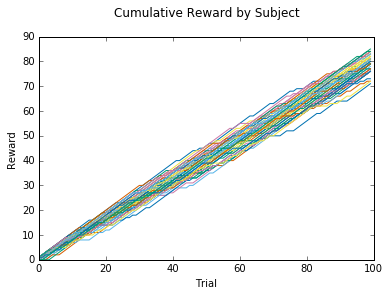

In [5]:
task_results.plot_cumreward()

If one was conducting this experiment on human subjects, he or she would not know the underlying parameters, as we do here. The problem, then becomes finding accurate estimates of the unknown parameters underlying the data generating process in human subjects. Fortunately, `fitr` can manage that using a method developed by Huys et al. (2011). It is that to which we now turn.

## Model-Fitting 

In the present case, we know that the true underlying model is a $\mathcal{Q}$-learning model with two free parameters, $\alpha$ (learning rate), and $\beta$ (choice randomness). Let's construct that model in order to estimate the parameters.

In [6]:
lrcr_model = fitr.fitrmodel(name=r'\lbrace \alpha, \beta \rbrace',
                            loglik_func=ll.bandit_ll(narms=narms).lr_cr, 
                            params=[fitr.LearningRate(), fitr.ChoiceRandomness()])

Fitting the model is now reduced to a single command:

In [7]:
lrcr_fit = lrcr_model.fit(data=task_results.data)

     MODEL: \lbrace \alpha, \beta \rbrace
     METHOD: Expectation-Maximization
     INITIALIZATION: Random Initialization
     N-RESTARTS: 1
     GRID REINITIALIZATION: True
     MAX EM ITERATIONS: 1000
     EARLY STOPPING: True
     CONVERGENCE LIMIT: 0.01
     OPTIMIZATION ALGORITHM: L-BFGS-B
     VERBOSE: True

ITERATION: 1 | [E-STEP] SUBJECT: 1 | POSTERIOR LOG-LIKELIHOOD: -500000000.0
     SUCCESS: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
ITERATION: 1 | [E-STEP] SUBJECT: 2 | POSTERIOR LOG-LIKELIHOOD: -490000066.282
     SUCCESS: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
ITERATION: 1 | [E-STEP] SUBJECT: 3 | POSTERIOR LOG-LIKELIHOOD: -480000135.028
     SUCCESS: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
ITERATION: 1 | [E-STEP] SUBJECT: 4 | POSTERIOR LOG-LIKELIHOOD: -470000196.298
     SUCCESS: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
ITERATION: 1 | [E-STEP] SUBJECT: 5 | POSTERIOR LOG-LIKELIHOOD: -460000228.221
     SUCCESS: CONVERGENCE: NORM_OF_PROJECTED_

     SUCCESS: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
ITERATION: 2 | [E-STEP] SUBJECT: 10 | POSTERIOR LOG-LIKELIHOOD: -1850.855
     SUCCESS: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
ITERATION: 2 | [E-STEP] SUBJECT: 11 | POSTERIOR LOG-LIKELIHOOD: -1842.259
     SUCCESS: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
ITERATION: 2 | [E-STEP] SUBJECT: 12 | POSTERIOR LOG-LIKELIHOOD: -1832.132
     SUCCESS: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
ITERATION: 2 | [E-STEP] SUBJECT: 13 | POSTERIOR LOG-LIKELIHOOD: -1822.631
     SUCCESS: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
ITERATION: 2 | [E-STEP] SUBJECT: 14 | POSTERIOR LOG-LIKELIHOOD: -1811.839
     SUCCESS: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
ITERATION: 2 | [E-STEP] SUBJECT: 15 | POSTERIOR LOG-LIKELIHOOD: -1800.153
     SUCCESS: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
ITERATION: 2 | [E-STEP] SUBJECT: 16 | POSTERIOR LOG-LIKELIHOOD: -1790.0
     SUCCESS: CONVERGENCE: NORM_OF_PROJECTE

     SUCCESS: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
ITERATION: 3 | [E-STEP] SUBJECT: 24 | POSTERIOR LOG-LIKELIHOOD: -1440.666
     SUCCESS: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
ITERATION: 3 | [E-STEP] SUBJECT: 25 | POSTERIOR LOG-LIKELIHOOD: -1440.328
     SUCCESS: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
ITERATION: 3 | [E-STEP] SUBJECT: 26 | POSTERIOR LOG-LIKELIHOOD: -1440.764
     SUCCESS: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
ITERATION: 3 | [E-STEP] SUBJECT: 27 | POSTERIOR LOG-LIKELIHOOD: -1439.012
     SUCCESS: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
ITERATION: 3 | [E-STEP] SUBJECT: 28 | POSTERIOR LOG-LIKELIHOOD: -1438.265
     SUCCESS: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
ITERATION: 3 | [E-STEP] SUBJECT: 29 | POSTERIOR LOG-LIKELIHOOD: -1438.468
     SUCCESS: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
ITERATION: 3 | [E-STEP] SUBJECT: 30 | POSTERIOR LOG-LIKELIHOOD: -1437.704
     SUCCESS: CONVERGENCE: NORM_OF_PROJECTE

     SUCCESS: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
ITERATION: 4 | [E-STEP] SUBJECT: 37 | POSTERIOR LOG-LIKELIHOOD: -1406.885
     SUCCESS: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
ITERATION: 4 | [E-STEP] SUBJECT: 38 | POSTERIOR LOG-LIKELIHOOD: -1406.179
     SUCCESS: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
ITERATION: 4 | [E-STEP] SUBJECT: 39 | POSTERIOR LOG-LIKELIHOOD: -1406.182
     SUCCESS: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
ITERATION: 4 | [E-STEP] SUBJECT: 40 | POSTERIOR LOG-LIKELIHOOD: -1406.086
     SUCCESS: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
ITERATION: 4 | [E-STEP] SUBJECT: 41 | POSTERIOR LOG-LIKELIHOOD: -1405.791
     SUCCESS: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
ITERATION: 4 | [E-STEP] SUBJECT: 42 | POSTERIOR LOG-LIKELIHOOD: -1405.611
     SUCCESS: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
ITERATION: 4 | [E-STEP] SUBJECT: 43 | POSTERIOR LOG-LIKELIHOOD: -1405.766
     SUCCESS: CONVERGENCE: REL_REDUCTION_OF_

     SUCCESS: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
ITERATION: 5 | [E-STEP] SUBJECT: 49 | POSTERIOR LOG-LIKELIHOOD: -1400.681
     SUCCESS: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
ITERATION: 5 | [E-STEP] SUBJECT: 50 | POSTERIOR LOG-LIKELIHOOD: -1400.665
     SUCCESS: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL

ITERATION: 5 | [M-STEP]

     M-STEP CONVERGED 

ITERATION: 6 | [E-STEP] SUBJECT: 1 | POSTERIOR LOG-LIKELIHOOD: -1400.706
     SUCCESS: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
ITERATION: 6 | [E-STEP] SUBJECT: 2 | POSTERIOR LOG-LIKELIHOOD: -1400.618
     SUCCESS: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
ITERATION: 6 | [E-STEP] SUBJECT: 3 | POSTERIOR LOG-LIKELIHOOD: -1400.463
     SUCCESS: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
ITERATION: 6 | [E-STEP] SUBJECT: 4 | POSTERIOR LOG-LIKELIHOOD: -1400.543
     SUCCESS: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
ITERATION: 6 | [E-STEP] SUBJECT: 5 | POSTERIOR LOG-LIKELIHOOD: -1400.468

     SUCCESS: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
ITERATION: 7 | [E-STEP] SUBJECT: 10 | POSTERIOR LOG-LIKELIHOOD: -1399.161
     SUCCESS: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
ITERATION: 7 | [E-STEP] SUBJECT: 11 | POSTERIOR LOG-LIKELIHOOD: -1399.125
     SUCCESS: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
ITERATION: 7 | [E-STEP] SUBJECT: 12 | POSTERIOR LOG-LIKELIHOOD: -1399.094
     SUCCESS: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
ITERATION: 7 | [E-STEP] SUBJECT: 13 | POSTERIOR LOG-LIKELIHOOD: -1399.037
     SUCCESS: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
ITERATION: 7 | [E-STEP] SUBJECT: 14 | POSTERIOR LOG-LIKELIHOOD: -1398.998
     SUCCESS: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
ITERATION: 7 | [E-STEP] SUBJECT: 15 | POSTERIOR LOG-LIKELIHOOD: -1399.002
     SUCCESS: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
ITERATION: 7 | [E-STEP] SUBJECT: 16 | POSTERIOR LOG-LIKELIHOOD: -1398.949
     SUCCESS: CONVERGENCE: NORM_OF_PROJECTE

We can check that the model fit was improved over Expectation-Maximization steps with the following command:

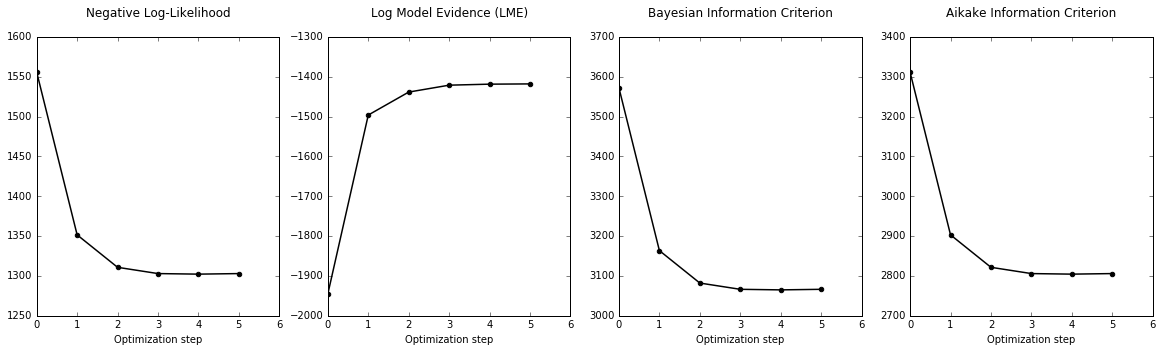

In [8]:
lrcr_fit.plot_fit_ts()

We would be generally happy with this case because LME is persistently increasing and then plateaus.

We can now plot the actual vs. estimated parameters. The closer the dots lie to the diagonal line, the better the fit.

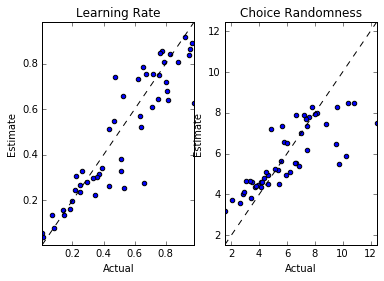

In [9]:
lrcr_fit.plot_ae(actual=task_results.params)

But what about if subjects are using different models? We should be estimating different potential model structures, which we can do by virtue of the `loglik_functions` module containing various log-likeihood functions for the same task, each corresponding to a different set of free-parameters. Here, we will add a model with a 'reward sensitivity' parameter, $\rho$, i.e.  

$$
\mathcal{Q}_t (s_t, a_t) = \mathcal{Q}_{t-1} (s_t, a_t) + \alpha (\rho \cdot r_t + \mathcal{Q}_{t-1} (s_t, a_t)), 
$$

and a model that does not learn, which we will call 'dummy model.' The dummy model will only have an inverse softmax temperature (i.e. 'choice randomness').

In [10]:
# Model with reward sensitivity
lrcrrs_model = fitr.fitrmodel(name=r'\lbrace \alpha, \beta, \rho \rbrace',
                              loglik_func=ll.bandit_ll(narms=narms).lr_cr_rs, 
                              params=[fitr.LearningRate(), 
                                      fitr.ChoiceRandomness(), 
                                      fitr.RewardSensitivity()])

# Dummy model 
dummy_model = fitr.fitrmodel(name='Dummy', 
                             loglik_func=ll.bandit_ll(narms=narms).dummy, 
                             params=[fitr.ChoiceRandomness()])

#Fit the models 
lrcrrs_fit = lrcrrs_model.fit(data=task_results.data)
dummy_fit = dummy_model.fit(data=task_results.data)

     MODEL: \lbrace \alpha, \beta, \rho \rbrace
     METHOD: Expectation-Maximization
     INITIALIZATION: Random Initialization
     N-RESTARTS: 1
     GRID REINITIALIZATION: True
     MAX EM ITERATIONS: 1000
     EARLY STOPPING: True
     CONVERGENCE LIMIT: 0.01
     OPTIMIZATION ALGORITHM: L-BFGS-B
     VERBOSE: True

ITERATION: 1 | [E-STEP] SUBJECT: 1 | POSTERIOR LOG-LIKELIHOOD: -500000000.0
     SUCCESS: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
ITERATION: 1 | [E-STEP] SUBJECT: 2 | POSTERIOR LOG-LIKELIHOOD: -490000066.91
     SUCCESS: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
ITERATION: 1 | [E-STEP] SUBJECT: 3 | POSTERIOR LOG-LIKELIHOOD: -480000135.298
     SUCCESS: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
ITERATION: 1 | [E-STEP] SUBJECT: 4 | POSTERIOR LOG-LIKELIHOOD: -470000198.965
     SUCCESS: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
ITERATION: 1 | [E-STEP] SUBJECT: 5 | POSTERIOR LOG-LIKELIHOOD: -460000239.127
     SUCCESS: CONVERGENCE: NORM_OF_PROJE

     SUCCESS: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
ITERATION: 2 | [E-STEP] SUBJECT: 7 | POSTERIOR LOG-LIKELIHOOD: -2175.18
     SUCCESS: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
ITERATION: 2 | [E-STEP] SUBJECT: 8 | POSTERIOR LOG-LIKELIHOOD: -2172.601
     SUCCESS: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
ITERATION: 2 | [E-STEP] SUBJECT: 9 | POSTERIOR LOG-LIKELIHOOD: -2151.093
     SUCCESS: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
ITERATION: 2 | [E-STEP] SUBJECT: 10 | POSTERIOR LOG-LIKELIHOOD: -2131.267
     SUCCESS: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
ITERATION: 2 | [E-STEP] SUBJECT: 11 | POSTERIOR LOG-LIKELIHOOD: -2116.174
     SUCCESS: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
ITERATION: 2 | [E-STEP] SUBJECT: 12 | POSTERIOR LOG-LIKELIHOOD: -2103.207
     SUCCESS: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
ITERATION: 2 | [E-STEP] SUBJECT: 13 | POSTERIOR LOG-LIKELIHOOD: -2087.244
     SUCCESS: CONVERGENCE: NORM_OF_PROJECTED_GR

     SUCCESS: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
ITERATION: 3 | [E-STEP] SUBJECT: 17 | POSTERIOR LOG-LIKELIHOOD: -1462.319
     SUCCESS: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
ITERATION: 3 | [E-STEP] SUBJECT: 18 | POSTERIOR LOG-LIKELIHOOD: -1459.826
     SUCCESS: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
ITERATION: 3 | [E-STEP] SUBJECT: 19 | POSTERIOR LOG-LIKELIHOOD: -1459.807
     SUCCESS: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
ITERATION: 3 | [E-STEP] SUBJECT: 20 | POSTERIOR LOG-LIKELIHOOD: -1459.304
     SUCCESS: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
ITERATION: 3 | [E-STEP] SUBJECT: 21 | POSTERIOR LOG-LIKELIHOOD: -1457.979
     SUCCESS: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
ITERATION: 3 | [E-STEP] SUBJECT: 22 | POSTERIOR LOG-LIKELIHOOD: -1458.844
     SUCCESS: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
ITERATION: 3 | [E-STEP] SUBJECT: 23 | POSTERIOR LOG-LIKELIHOOD: -1457.485
     SUCCESS: CONVERGENCE: REL_REDUCTION_OF_F_

     SUCCESS: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
ITERATION: 4 | [E-STEP] SUBJECT: 29 | POSTERIOR LOG-LIKELIHOOD: -1427.972
     SUCCESS: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
ITERATION: 4 | [E-STEP] SUBJECT: 30 | POSTERIOR LOG-LIKELIHOOD: -1428.042
     SUCCESS: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
ITERATION: 4 | [E-STEP] SUBJECT: 31 | POSTERIOR LOG-LIKELIHOOD: -1428.022
     SUCCESS: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
ITERATION: 4 | [E-STEP] SUBJECT: 32 | POSTERIOR LOG-LIKELIHOOD: -1428.024
     SUCCESS: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
ITERATION: 4 | [E-STEP] SUBJECT: 33 | POSTERIOR LOG-LIKELIHOOD: -1428.016
     SUCCESS: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
ITERATION: 4 | [E-STEP] SUBJECT: 34 | POSTERIOR LOG-LIKELIHOOD: -1427.823
     SUCCESS: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
ITERATION: 4 | [E-STEP] SUBJECT: 35 | POSTERIOR LOG-LIKELIHOOD: -1427.953
     SUCCESS: CONVERGENCE: NORM_OF_PROJECTED_

     SUCCESS: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
ITERATION: 5 | [E-STEP] SUBJECT: 39 | POSTERIOR LOG-LIKELIHOOD: -1426.295
     SUCCESS: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
ITERATION: 5 | [E-STEP] SUBJECT: 40 | POSTERIOR LOG-LIKELIHOOD: -1426.322
     SUCCESS: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
ITERATION: 5 | [E-STEP] SUBJECT: 41 | POSTERIOR LOG-LIKELIHOOD: -1426.264
     SUCCESS: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
ITERATION: 5 | [E-STEP] SUBJECT: 42 | POSTERIOR LOG-LIKELIHOOD: -1426.356
     SUCCESS: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
ITERATION: 5 | [E-STEP] SUBJECT: 43 | POSTERIOR LOG-LIKELIHOOD: -1426.47
     SUCCESS: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
ITERATION: 5 | [E-STEP] SUBJECT: 44 | POSTERIOR LOG-LIKELIHOOD: -1426.575
     SUCCESS: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
ITERATION: 5 | [E-STEP] SUBJECT: 45 | POSTERIOR LOG-LIKELIHOOD: -1426.529
     SUCCESS: CONVERGENCE: NORM_OF_PROJECTED_

     SUCCESS: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
ITERATION: 6 | [E-STEP] SUBJECT: 49 | POSTERIOR LOG-LIKELIHOOD: -1429.782
     SUCCESS: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
ITERATION: 6 | [E-STEP] SUBJECT: 50 | POSTERIOR LOG-LIKELIHOOD: -1429.905
     SUCCESS: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL

ITERATION: 6 | [M-STEP]

     M-STEP CONVERGED 

ITERATION: 7 | [E-STEP] SUBJECT: 1 | POSTERIOR LOG-LIKELIHOOD: -1429.976
     SUCCESS: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
ITERATION: 7 | [E-STEP] SUBJECT: 2 | POSTERIOR LOG-LIKELIHOOD: -1430.092
     SUCCESS: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
ITERATION: 7 | [E-STEP] SUBJECT: 3 | POSTERIOR LOG-LIKELIHOOD: -1430.178
     SUCCESS: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
ITERATION: 7 | [E-STEP] SUBJECT: 4 | POSTERIOR LOG-LIKELIHOOD: -1430.363
     SUCCESS: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
ITERATION: 7 | [E-STEP] SUBJECT: 5 | POSTERIOR LOG-LIKELIHOOD: -1430.493

     SUCCESS: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
ITERATION: 8 | [E-STEP] SUBJECT: 9 | POSTERIOR LOG-LIKELIHOOD: -1438.449
     SUCCESS: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
ITERATION: 8 | [E-STEP] SUBJECT: 10 | POSTERIOR LOG-LIKELIHOOD: -1438.648
     SUCCESS: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
ITERATION: 8 | [E-STEP] SUBJECT: 11 | POSTERIOR LOG-LIKELIHOOD: -1438.828
     SUCCESS: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
ITERATION: 8 | [E-STEP] SUBJECT: 12 | POSTERIOR LOG-LIKELIHOOD: -1439.025
     SUCCESS: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
ITERATION: 8 | [E-STEP] SUBJECT: 13 | POSTERIOR LOG-LIKELIHOOD: -1439.173
     SUCCESS: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
ITERATION: 8 | [E-STEP] SUBJECT: 14 | POSTERIOR LOG-LIKELIHOOD: -1439.364
     SUCCESS: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
ITERATION: 8 | [E-STEP] SUBJECT: 15 | POSTERIOR LOG-LIKELIHOOD: -1439.533
     SUCCESS: CONVERGENCE: REL_REDUCTION_OF_F

     SUCCESS: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
ITERATION: 9 | [E-STEP] SUBJECT: 21 | POSTERIOR LOG-LIKELIHOOD: -1449.955
     SUCCESS: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
ITERATION: 9 | [E-STEP] SUBJECT: 22 | POSTERIOR LOG-LIKELIHOOD: -1450.158
     SUCCESS: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
ITERATION: 9 | [E-STEP] SUBJECT: 23 | POSTERIOR LOG-LIKELIHOOD: -1450.368
     SUCCESS: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
ITERATION: 9 | [E-STEP] SUBJECT: 24 | POSTERIOR LOG-LIKELIHOOD: -1450.574
     SUCCESS: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
ITERATION: 9 | [E-STEP] SUBJECT: 25 | POSTERIOR LOG-LIKELIHOOD: -1450.783
     SUCCESS: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
ITERATION: 9 | [E-STEP] SUBJECT: 26 | POSTERIOR LOG-LIKELIHOOD: -1450.959
     SUCCESS: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
ITERATION: 9 | [E-STEP] SUBJECT: 27 | POSTERIOR LOG-LIKELIHOOD: -1451.126
     SUCCESS: CONVERGENCE: REL_REDUCTION_OF_

     SUCCESS: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
ITERATION: 2 | [E-STEP] SUBJECT: 2 | POSTERIOR LOG-LIKELIHOOD: -3454.997
     SUCCESS: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
ITERATION: 2 | [E-STEP] SUBJECT: 3 | POSTERIOR LOG-LIKELIHOOD: -3455.875
     SUCCESS: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
ITERATION: 2 | [E-STEP] SUBJECT: 4 | POSTERIOR LOG-LIKELIHOOD: -3456.754
     SUCCESS: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
ITERATION: 2 | [E-STEP] SUBJECT: 5 | POSTERIOR LOG-LIKELIHOOD: -3457.633
     SUCCESS: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
ITERATION: 2 | [E-STEP] SUBJECT: 6 | POSTERIOR LOG-LIKELIHOOD: -3458.511
     SUCCESS: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
ITERATION: 2 | [E-STEP] SUBJECT: 7 | POSTERIOR LOG-LIKELIHOOD: -3459.39
     SUCCESS: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
ITERATION: 2 | [E-STEP] SUBJECT: 8 | POSTERIOR LOG-LIKELIHOOD: -3460.268
     SUCCESS: CONVERGENCE: NORM_OF_PROJECTED_GRAD

## Model Comparison and Selection 

Which of the above models is the one that best fits the data? For this quesiton, we have incorporated Bayesian Model Selection (Rigoux et al., 2014) into `fitr`. This can easily be performed using the following command:

In [11]:
bms_results = model_selection.BMS(model_fits=[lrcr_fit, lrcrrs_fit, dummy_fit], c_limit=1e-100).run()

===== STARTING BAYESIAN MODEL SELECTION =====
Number of models: 3
Subjects: 50
Convergence limit: 1e-100

[BMS] ITERATION: 1
[BMS] ITERATION: 2
[BMS] ITERATION: 3
[BMS] ITERATION: 4
[BMS] ITERATION: 5
[BMS] ITERATION: 6
[BMS] ITERATION: 7
[BMS] ITERATION: 8
[BMS] ITERATION: 9
[BMS] ITERATION: 10


Now you can plot the protected exceedance probabilities to determine which model is the most probable in this group of subjects:

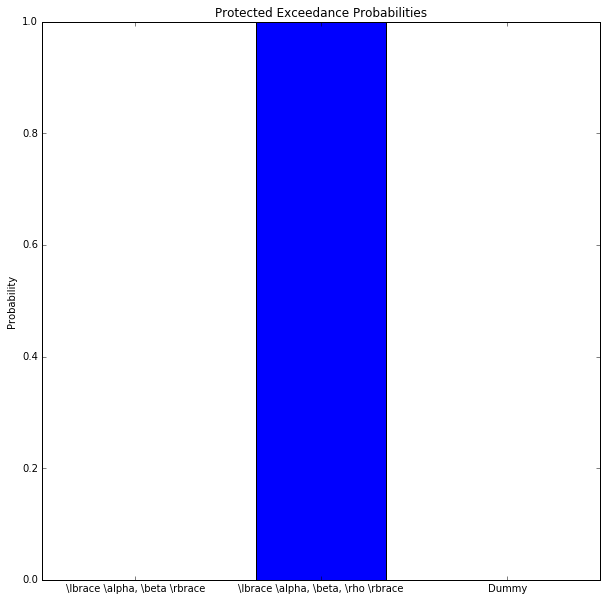

In [12]:
bms_results.plot(statistic='pxp')